In [1]:
from google.colab import files 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
%matplotlib inline

from tensorflow.keras import utils 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from google.colab import drive 
import time 

In [3]:
df = pd.read_csv('drive/MyDrive/Нейросети/clean_data.csv', sep=',')

In [4]:
def readText(fileName):
  f = open(fileName, 'r')       
  text = f.read()                
  text = text.replace("\n", " ") 
  
  return text    

In [5]:
df.head()

,text,category,theme
0,Здравствуйте. Подскажите пожалуйста можно ли с...,Дороги и транспорт,Запрос на льготы / субсидии
1,Подскажите пожалуйста имеют ли право не платит...,ЖКХ,Запрос юридической консультации
2,""" Спасибо Вам огромное за возобновление строит...",Строительство,Запрос юридической консультации
3,Проблема одна и общая стала в городе. Спорт. у...,Спорт,Недовольство общее
4,Некоторое время назад для школьников и студент...,Дороги и транспорт,Запрос на льготы / субсидии


In [6]:
len = 1
className = ["text", "category", "theme"] 

In [7]:
df

,text,category,theme
0,Здравствуйте. Подскажите пожалуйста можно ли с...,Дороги и транспорт,Запрос на льготы / субсидии
1,Подскажите пожалуйста имеют ли право не платит...,ЖКХ,Запрос юридической консультации
2,""" Спасибо Вам огромное за возобновление строит...",Строительство,Запрос юридической консультации
3,Проблема одна и общая стала в городе. Спорт. у...,Спорт,Недовольство общее
4,Некоторое время назад для школьников и студент...,Дороги и транспорт,Запрос на льготы / субсидии
...,...,...,...
10054,Единственная асфальтированная дорога в п. Заре...,Благо­­устрой­­ство,NaN
10055,УВАЖАЕМЫЙ ИГОРЬ ГЕОРГИЕВИЧ! В ПОСЕЛКЕ ЛЕВ ТОЛС...,Борьба с коррупцией,NaN
10056,Здравствуйте! 19 июня 2019 года затопило магаз...,ЖКХ,NaN
10057,Уважаемый! Помогите пожалуйста решить проблему...,ЖКХ,NaN


In [8]:
df.isnull()

,text,category,theme
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10054,False,False,True
10055,False,False,True
10056,False,False,True
10057,False,False,True


In [9]:
df.fillna(value='тема не указана', method=None, axis=None, inplace=False, limit=None, downcast=None)

,text,category,theme
0,Здравствуйте. Подскажите пожалуйста можно ли с...,Дороги и транспорт,Запрос на льготы / субсидии
1,Подскажите пожалуйста имеют ли право не платит...,ЖКХ,Запрос юридической консультации
2,""" Спасибо Вам огромное за возобновление строит...",Строительство,Запрос юридической консультации
3,Проблема одна и общая стала в городе. Спорт. у...,Спорт,Недовольство общее
4,Некоторое время назад для школьников и студент...,Дороги и транспорт,Запрос на льготы / субсидии
...,...,...,...
10054,Единственная асфальтированная дорога в п. Заре...,Благо­­устрой­­ство,тема не указана
10055,УВАЖАЕМЫЙ ИГОРЬ ГЕОРГИЕВИЧ! В ПОСЕЛКЕ ЛЕВ ТОЛС...,Борьба с коррупцией,тема не указана
10056,Здравствуйте! 19 июня 2019 года затопило магаз...,ЖКХ,тема не указана
10057,Уважаемый! Помогите пожалуйста решить проблему...,ЖКХ,тема не указана


In [10]:
print(df.values[0])

['Здравствуйте. Подскажите пожалуйста можно ли сделать проезд для школьников по льготной цене. Для людей работающих в бюджетной организации, с детьми на проезд уходит значительная часть денег на оплату проезда .'
 'Дороги и транспорт' 'Запрос на льготы / субсидии']


In [22]:
for cl in df['category'].unique(): 
  print('Количество обращений в категории ', cl, ': ', df[df.category == cl].shape[0])

Количество обращений в категории  Дороги и транспорт :  1411
Количество обращений в категории  ЖКХ :  2063
Количество обращений в категории  Строительство :  349
Количество обращений в категории  Спорт :  246
Количество обращений в категории  Благо­­устрой­­ство :  1686
Количество обращений в категории  Образование и наука :  290
Количество обращений в категории  Культура :  100
Количество обращений в категории  Демография :  20
Количество обращений в категории  Социальная сфера :  370
Количество обращений в категории  Другое :  208
Количество обращений в категории  Бизнес :  187
Количество обращений в категории  Здравоохранение :  368
Количество обращений в категории  Органы власти :  244
Количество обращений в категории  Экология :  180
Количество обращений в категории  Правопорядок :  172
Количество обращений в категории  Труд и занятость населения :  151
Количество обращений в категории  Борьба с коррупцией :  59
Количество обращений в категории  Промышленность :  13
Количество обр

In [23]:
texts = df['text'].values 
classes = list(df['category'].values) 
maxWordsCount = 71000 

print(df['category'].unique()) 
nClasses = df['category'].nunique()+1 
print(nClasses) 

['Дороги и транспорт' 'ЖКХ' 'Строительство' 'Спорт'
 'Благо\xad\xadустрой\xad\xadство' 'Образование и наука' 'Культура'
 'Демография' 'Социальная сфера' 'Другое' 'Бизнес' 'Здравоохранение'
 'Органы власти' 'Экология' 'Правопорядок' 'Труд и занятость населения'
 'Борьба с коррупцией' 'Промышленность' 'Сельское хозяйство'
 'Земельные отношения' 'Туризм' nan]
22


In [24]:
maxCountStrings = 500 
minCountStrings = 360 
df = df.dropna().reset_index() 

for cl in df['category'].unique(): 
  initialLen = df[df.category == cl].shape[0]
  if(df[df.category == cl].shape[0] < minCountStrings): 
    df = df.drop(df[df.category == cl].index) 
  if(df[df.category == cl].shape[0] > maxCountStrings): 
    df = df.drop(df[df.category == cl].index[maxCountStrings:]) 
  print('Количество обращений в категории ', cl, ': ', initialLen, '. В выборку вошло: ', df[df.category == cl].shape[0], sep='')
  
df = df.reset_index()

Количество обращений в категории Дороги и транспорт: 1400. В выборку вошло: 500
Количество обращений в категории ЖКХ: 2042. В выборку вошло: 500
Количество обращений в категории Строительство: 348. В выборку вошло: 0
Количество обращений в категории Спорт: 245. В выборку вошло: 0
Количество обращений в категории Благо­­устрой­­ство: 1676. В выборку вошло: 500
Количество обращений в категории Образование и наука: 289. В выборку вошло: 0
Количество обращений в категории Культура: 99. В выборку вошло: 0
Количество обращений в категории Демография: 20. В выборку вошло: 0
Количество обращений в категории Социальная сфера: 367. В выборку вошло: 367
Количество обращений в категории Другое: 208. В выборку вошло: 0
Количество обращений в категории Бизнес: 187. В выборку вошло: 0
Количество обращений в категории Здравоохранение: 367. В выборку вошло: 367
Количество обращений в категории Органы власти: 239. В выборку вошло: 0
Количество обращений в категории Экология: 179. В выборку вошло: 0
Коли

In [25]:
texts = df['text'].values 
classes = list(df['category'].values) 
maxWordsCount = 71000 

print(df['category'].unique()) 
nClasses = df['category'].nunique()+1  
print(nClasses) 

['Дороги и транспорт' 'ЖКХ' 'Благо\xad\xadустрой\xad\xadство'
 'Социальная сфера' 'Здравоохранение']
6


In [27]:
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(texts) 


xAll = tokenizer.texts_to_matrix(texts) 
print(xAll.shape)  
print(xAll[0, :20])

(2234, 71000)
[0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [28]:
print(tokenizer.word_index.items()) 

dict_items([('unknown', 1), ('в', 2), ('и', 3), ('на', 4), ('не', 5), ('с', 6), ('по', 7), ('что', 8), ('а', 9), ('к', 10), ('я', 11), ('за', 12), ('но', 13), ('как', 14), ('у', 15), ('для', 16), ('мы', 17), ('от', 18), ('это', 19), ('так', 20), ('нет', 21), ('то', 22), ('из', 23), ('все', 24), ('до', 25), ('нас', 26), ('о', 27), ('очень', 28), ('г', 29), ('дома', 30), ('года', 31), ('ул', 32), ('нам', 33), ('уже', 34), ('мне', 35), ('№', 36), ('прошу', 37), ('только', 38), ('лет', 39), ('было', 40), ('же', 41), ('области', 42), ('бы', 43), ('время', 44), ('города', 45), ('день', 46), ('при', 47), ('если', 48), ('меня', 49), ('вам', 50), ('липецкой', 51), ('или', 52), ('ни', 53), ('здравствуйте', 54), ('вас', 55), ('дом', 56), ('детей', 57), ('т', 58), ('после', 59), ('они', 60), ('д', 61), ('есть', 62), ('чтобы', 63), ('дороги', 64), ('2018', 65), ('когда', 66), ('там', 67), ('году', 68), ('улице', 69), ('этом', 70), ('его', 71), ('где', 72), ('во', 73), ('без', 74), ('спасибо', 75), 

In [29]:
encoder = LabelEncoder() 
encoder.fit(classes) 
classesEncoded = encoder.transform(classes) 
yAll = utils.to_categorical(classesEncoded, nClasses) 
print(yAll.shape) 
print(yAll[0]) 

(2234, 6)
[0. 1. 0. 0. 0. 0.]


In [30]:
xTrain, xVal, yTrain, yVal = train_test_split(xAll, yAll, test_size=0.5)
print(xTrain.shape)
print(yTrain.shape) 

(1117, 71000)
(1117, 6)


In [31]:
Sequences = tokenizer.texts_to_sequences(texts) 
npSequences = np.array(Sequences)                
xTrainE, xValE, yTrainE, yValE = train_test_split(npSequences, yAll, test_size=0.5)
print(xTrainE.shape) 
print(yTrain.shape) 

(1117,)
(1117, 6)


<ipython-input-31-0c0c15fa3f3f>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  npSequences = np.array(Sequences)


Epoch 1/50
8/8 [==============================] - 7s 754ms/step - loss: 1.7807 - accuracy: 0.2041 - val_loss: 1.7183 - val_accuracy: 0.4467
Epoch 2/50
8/8 [==============================] - 5s 547ms/step - loss: 1.6745 - accuracy: 0.3214 - val_loss: 1.5714 - val_accuracy: 0.4915
Epoch 3/50
8/8 [==============================] - 3s 412ms/step - loss: 1.5468 - accuracy: 0.3626 - val_loss: 1.3953 - val_accuracy: 0.5103
Epoch 4/50
8/8 [==============================] - 3s 424ms/step - loss: 1.3555 - accuracy: 0.4772 - val_loss: 1.2054 - val_accuracy: 0.5900
Epoch 5/50
8/8 [==============================] - 6s 757ms/step - loss: 1.1422 - accuracy: 0.5783 - val_loss: 1.0164 - val_accuracy: 0.7135
Epoch 6/50
8/8 [==============================] - 4s 507ms/step - loss: 0.9251 - accuracy: 0.6804 - val_loss: 0.8597 - val_accuracy: 0.7601
Epoch 7/50
8/8 [==============================] - 3s 431ms/step - loss: 0.7628 - accuracy: 0.7511 - val_loss: 0.7568 - val_accuracy: 0.7672
Epoch 8/50
8/8 [====

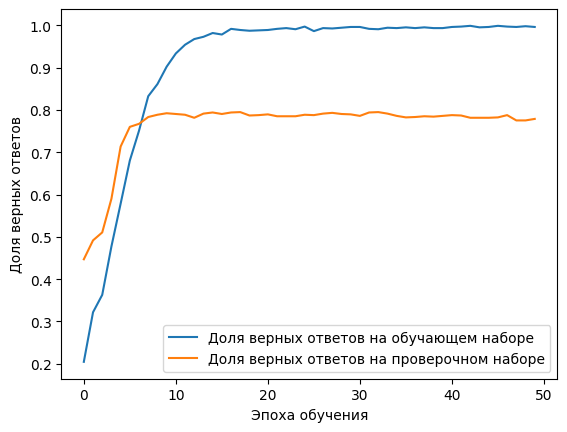

In [32]:
model01 = Sequential()
model01.add(Dense(150, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.5))
model01.add(Dense(120, activation='relu'))
model01.add(Dropout(0.5))
model01.add(Dense(100, activation='relu'))
model01.add(Dropout(0.5))
model01.add(Dense(nClasses, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=50,
                    batch_size=150,
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()